In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
import gc; gc.enable()

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [2]:
%store -r dataset2
dataset2

,label,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,...,Permian,Pleistocene,Pliocene,Precambrian,Proterozoic,Quaternary,Silurian,Tertiary,Triassic,unknown
id,,,,,,,,,,,,,,,,,,,,,
8888,0,-466.406891,-6.900751,-109.427673,85.052681,1.003615,53.523384,13.763311,1.070029,1.977709,...,0,0,0,0,0,0,0,0,0,0
14292,1,-503.673187,-120.126038,-31.623005,-80.718369,0.558596,36.331478,9.172354,1.083756,2.032895,...,0,0,0,0,0,0,0,0,0,0
132399,0,-27.807846,103.177826,-63.601978,141.103851,0.311083,15.122674,6.330700,0.381835,2.014347,...,0,0,0,0,0,0,0,0,0,0
183374,1,-576.454712,-121.468323,-35.086399,-60.554379,0.641135,36.238609,7.337316,1.683628,1.973036,...,0,0,0,0,0,0,0,1,0,0
222338,2,337.696960,449.877472,126.945335,460.823090,0.708677,21.707319,3.609447,0.605687,1.733690,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99702439,2,54.936104,297.003296,-159.786224,-83.932182,0.242275,13.863712,4.269045,0.008501,1.718579,...,0,0,0,0,0,0,0,0,0,0
99736264,1,-488.949951,211.485718,-43.169415,-69.946159,2.065807,77.188553,14.764034,2.352498,1.812306,...,0,0,0,0,0,0,0,0,0,0
99744076,0,-31.221964,64.519661,-27.865591,-45.698895,0.728778,34.454945,7.617178,1.044360,2.025275,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dataset_train = dataset2
dataset_train

,label,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,...,Permian,Pleistocene,Pliocene,Precambrian,Proterozoic,Quaternary,Silurian,Tertiary,Triassic,unknown
id,,,,,,,,,,,,,,,,,,,,,
8888,0,-466.406891,-6.900751,-109.427673,85.052681,1.003615,53.523384,13.763311,1.070029,1.977709,...,0,0,0,0,0,0,0,0,0,0
14292,1,-503.673187,-120.126038,-31.623005,-80.718369,0.558596,36.331478,9.172354,1.083756,2.032895,...,0,0,0,0,0,0,0,0,0,0
132399,0,-27.807846,103.177826,-63.601978,141.103851,0.311083,15.122674,6.330700,0.381835,2.014347,...,0,0,0,0,0,0,0,0,0,0
183374,1,-576.454712,-121.468323,-35.086399,-60.554379,0.641135,36.238609,7.337316,1.683628,1.973036,...,0,0,0,0,0,0,0,1,0,0
222338,2,337.696960,449.877472,126.945335,460.823090,0.708677,21.707319,3.609447,0.605687,1.733690,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99702439,2,54.936104,297.003296,-159.786224,-83.932182,0.242275,13.863712,4.269045,0.008501,1.718579,...,0,0,0,0,0,0,0,0,0,0
99736264,1,-488.949951,211.485718,-43.169415,-69.946159,2.065807,77.188553,14.764034,2.352498,1.812306,...,0,0,0,0,0,0,0,0,0,0
99744076,0,-31.221964,64.519661,-27.865591,-45.698895,0.728778,34.454945,7.617178,1.044360,2.025275,...,0,0,0,0,0,0,0,0,0,0


In [4]:
%store -r dataset_test
dataset_test

,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,alohgroup_mean,...,Permian,Pleistocene,Pliocene,Precambrian,Proterozoic,Quaternary,Silurian,Tertiary,Triassic,unknown
id,,,,,,,,,,,,,,,,,,,,,
651042,-416.475464,-29.474852,-80.882034,-159.218964,0.559518,37.386963,9.538497,1.106709,2.019277,0.910546,...,0,0,0,0,0,0,0,0,0,0
846303,-57.920696,290.547424,-72.959480,-139.705322,3.003618,132.838791,27.449354,4.422690,1.889670,0.054801,...,0,0,0,0,0,0,0,0,0,0
985898,-125.842140,251.419769,-55.920357,-35.973377,0.797613,30.958279,7.428962,0.352295,1.907533,0.179958,...,0,0,0,0,0,0,0,0,0,0
1080138,-70.876877,291.286316,25.118435,36.856091,0.338573,44.600971,14.142774,0.863618,1.997229,0.790180,...,0,0,0,0,0,0,0,0,0,0
1197584,-348.512787,-41.691257,101.793472,34.894329,2.152599,149.641891,38.040848,4.690095,2.104270,1.038224,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99534551,-25.235031,91.829391,-35.663929,-61.898300,0.658843,39.868889,9.720474,1.235184,1.951000,0.205318,...,0,0,0,0,0,0,0,0,0,0
99539633,-92.203331,145.817413,-43.361671,-39.651108,0.515028,35.748203,9.039088,1.139943,1.270008,0.002526,...,0,0,0,0,0,0,0,0,0,0
99629381,198.469055,347.144104,290.650146,160.066498,0.950999,38.267311,7.897589,1.080804,2.010729,0.910162,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset_train

,label,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,...,Permian,Pleistocene,Pliocene,Precambrian,Proterozoic,Quaternary,Silurian,Tertiary,Triassic,unknown
id,,,,,,,,,,,,,,,,,,,,,
8888,0,-466.406891,-6.900751,-109.427673,85.052681,1.003615,53.523384,13.763311,1.070029,1.977709,...,0,0,0,0,0,0,0,0,0,0
14292,1,-503.673187,-120.126038,-31.623005,-80.718369,0.558596,36.331478,9.172354,1.083756,2.032895,...,0,0,0,0,0,0,0,0,0,0
132399,0,-27.807846,103.177826,-63.601978,141.103851,0.311083,15.122674,6.330700,0.381835,2.014347,...,0,0,0,0,0,0,0,0,0,0
183374,1,-576.454712,-121.468323,-35.086399,-60.554379,0.641135,36.238609,7.337316,1.683628,1.973036,...,0,0,0,0,0,0,0,1,0,0
222338,2,337.696960,449.877472,126.945335,460.823090,0.708677,21.707319,3.609447,0.605687,1.733690,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99702439,2,54.936104,297.003296,-159.786224,-83.932182,0.242275,13.863712,4.269045,0.008501,1.718579,...,0,0,0,0,0,0,0,0,0,0
99736264,1,-488.949951,211.485718,-43.169415,-69.946159,2.065807,77.188553,14.764034,2.352498,1.812306,...,0,0,0,0,0,0,0,0,0,0
99744076,0,-31.221964,64.519661,-27.865591,-45.698895,0.728778,34.454945,7.617178,1.044360,2.025275,...,0,0,0,0,0,0,0,0,0,0


In [6]:
labels = pd.read_csv('api_resources_test_commodity_locations.csv')

In [7]:
labels.groupby(['stamp_id']).count()

,x,y,commodity
stamp_id,,,
651042,7,7,7
846303,5,5,5
1015954,8,8,8
1276371,1,1,1
1413763,1,1,1
...,...,...,...
99301634,7,7,7
99466218,1,1,1
99534551,3,3,3


In [8]:
labels.nunique()

stamp_id      372
x            1310
y            1310
commodity     101
dtype: int64

In [9]:
dataset_train['label'].value_counts()

0    696
1    367
2    266
4    161
5    137
3     39
6     23
Name: label, dtype: int64

In [10]:
binary_train = dataset_train['label'].replace(2,0).replace(3,0).replace(4,0).replace(5,0).replace(6,0)

In [11]:
train = dataset_train
train

,label,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,...,Permian,Pleistocene,Pliocene,Precambrian,Proterozoic,Quaternary,Silurian,Tertiary,Triassic,unknown
id,,,,,,,,,,,,,,,,,,,,,
8888,0,-466.406891,-6.900751,-109.427673,85.052681,1.003615,53.523384,13.763311,1.070029,1.977709,...,0,0,0,0,0,0,0,0,0,0
14292,1,-503.673187,-120.126038,-31.623005,-80.718369,0.558596,36.331478,9.172354,1.083756,2.032895,...,0,0,0,0,0,0,0,0,0,0
132399,0,-27.807846,103.177826,-63.601978,141.103851,0.311083,15.122674,6.330700,0.381835,2.014347,...,0,0,0,0,0,0,0,0,0,0
183374,1,-576.454712,-121.468323,-35.086399,-60.554379,0.641135,36.238609,7.337316,1.683628,1.973036,...,0,0,0,0,0,0,0,1,0,0
222338,2,337.696960,449.877472,126.945335,460.823090,0.708677,21.707319,3.609447,0.605687,1.733690,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99702439,2,54.936104,297.003296,-159.786224,-83.932182,0.242275,13.863712,4.269045,0.008501,1.718579,...,0,0,0,0,0,0,0,0,0,0
99736264,1,-488.949951,211.485718,-43.169415,-69.946159,2.065807,77.188553,14.764034,2.352498,1.812306,...,0,0,0,0,0,0,0,0,0,0
99744076,0,-31.221964,64.519661,-27.865591,-45.698895,0.728778,34.454945,7.617178,1.044360,2.025275,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train['gold'] = binary_train
train

,label,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,...,Pleistocene,Pliocene,Precambrian,Proterozoic,Quaternary,Silurian,Tertiary,Triassic,unknown,gold
id,,,,,,,,,,,,,,,,,,,,,
8888,0,-466.406891,-6.900751,-109.427673,85.052681,1.003615,53.523384,13.763311,1.070029,1.977709,...,0,0,0,0,0,0,0,0,0,0
14292,1,-503.673187,-120.126038,-31.623005,-80.718369,0.558596,36.331478,9.172354,1.083756,2.032895,...,0,0,0,0,0,0,0,0,0,1
132399,0,-27.807846,103.177826,-63.601978,141.103851,0.311083,15.122674,6.330700,0.381835,2.014347,...,0,0,0,0,0,0,0,0,0,0
183374,1,-576.454712,-121.468323,-35.086399,-60.554379,0.641135,36.238609,7.337316,1.683628,1.973036,...,0,0,0,0,0,0,1,0,0,1
222338,2,337.696960,449.877472,126.945335,460.823090,0.708677,21.707319,3.609447,0.605687,1.733690,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99702439,2,54.936104,297.003296,-159.786224,-83.932182,0.242275,13.863712,4.269045,0.008501,1.718579,...,0,0,0,0,0,0,0,0,0,0
99736264,1,-488.949951,211.485718,-43.169415,-69.946159,2.065807,77.188553,14.764034,2.352498,1.812306,...,0,0,0,0,0,0,0,0,0,1
99744076,0,-31.221964,64.519661,-27.865591,-45.698895,0.728778,34.454945,7.617178,1.044360,2.025275,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.drop(columns='label',inplace = True)

In [14]:
train.head()

,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,alohgroup_mean,...,Pleistocene,Pliocene,Precambrian,Proterozoic,Quaternary,Silurian,Tertiary,Triassic,unknown,gold
id,,,,,,,,,,,,,,,,,,,,,
8888,-466.406891,-6.900751,-109.427673,85.052681,1.003615,53.523384,13.763311,1.070029,1.977709,0.634345,...,0,0,0,0,0,0,0,0,0,0
14292,-503.673187,-120.126038,-31.623005,-80.718369,0.558596,36.331478,9.172354,1.083756,2.032895,0.910935,...,0,0,0,0,0,0,0,0,0,1
132399,-27.807846,103.177826,-63.601978,141.103851,0.311083,15.122674,6.330700,0.381835,2.014347,0.998933,...,0,0,0,0,0,0,0,0,0,0
183374,-576.454712,-121.468323,-35.086399,-60.554379,0.641135,36.238609,7.337316,1.683628,1.973036,0.817584,...,0,0,0,0,0,0,1,0,0,1
222338,337.696960,449.877472,126.945335,460.823090,0.708677,21.707319,3.609447,0.605687,1.733690,0.016196,...,0,0,0,0,0,0,0,0,0,0


In [15]:
target = 'gold'

In [16]:
used_cols = [c for c in train.columns.tolist() if c not in [target]]
X = train[used_cols]
y = train[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [18]:
df_results = pd.DataFrame(columns =['Model','test_balanced_acc','train_balanced_acc', 'info'])

In [19]:
scaler = RobustScaler()

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced', max_depth=5,max_leaf_nodes= 31)

In [21]:
pipe = make_pipeline(scaler,rf)

In [22]:

thresh = 0.7

pipe.fit(X_train,y_train)
# predictions on train set
# y_pred = pipe.predict(X_train)
y_pred =( pipe.predict_proba(X_train)[:,1] > thresh).astype(np.int)

# predictions on test set
y_pred_test = (pipe.predict_proba(X_test)[:,1] > thresh).astype(np.int)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.8372827804107424
TEST: 0.8250591016548463

Balanced Accuracy:
TRAIN: 0.6451591597101184
TEST: 0.6174471299093656


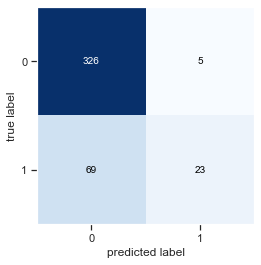

In [25]:
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [29]:
y_test.value_counts()

0    331
1     92
Name: gold, dtype: int64

In [62]:
df_results = df_results.append({       # first trial is written in results 
     "Model": 'RandomForest' ,
      "test_balanced_acc": 0.725 , 
       'train_balanced_acc' : 0.956,
               'info' : 'gridsearch best param'}, ignore_index=True)

Accuracy:
TRAIN: 1.0
TEST: 0.8416075650118203

Balanced Accuracy:
TRAIN: 1.0
TEST: 0.6947326940759228


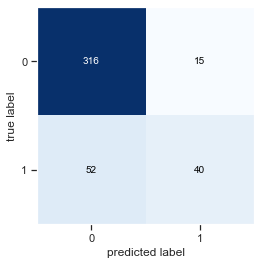

In [109]:
lgbm = LGBMClassifier(booster = 'gbtree', nrounds = 'min.error.idx', maximize = False,eta = .1,max_depth = 5, 
                      colsample_bytree = .4,learning_rate = 0.1,max_delta_step=1)

# #sending everthing in pipe
pipe = make_pipeline(scaler,lgbm)
pipe.fit(X_train, y_train)

# # predictions on train set
# y_pred = pipe.predict(X_train)

# # predictions on test set
# y_pred_test = pipe.predict(X_test)

thresh = 0.6

pipe.fit(X_train,y_train)
# predictions on train set
y_pred =( pipe.predict_proba(X_train)[:,1] > thresh).astype(np.int)

# predictions on test set
y_pred_test = (pipe.predict_proba(X_test)[:,1] > thresh).astype(np.int)

print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [67]:
df_results = df_results.append({       # trial is written in results 
     "Model": 'LGBM' ,
      "test_balanced_acc": 0.669 , 
       'train_balanced_acc' : 1.0 ,
               'info' : ''}, ignore_index=True)

Accuracy:
TRAIN: 1.0
TEST: 0.8274231678486997

Balanced Accuracy:
TRAIN: 1.0
TEST: 0.6778208327860239


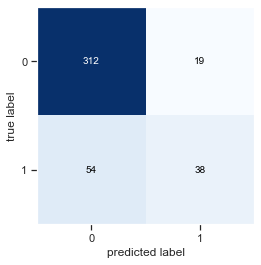

In [112]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

pipe = make_pipeline(scaler,xgb)
pipe.fit(X_train, y_train)

thresh = 0.6

pipe.fit(X_train,y_train)
# predictions on train set
y_pred =( pipe.predict_proba(X_train)[:,1] > thresh).astype(np.int)

# predictions on test set
y_pred_test = (pipe.predict_proba(X_test)[:,1] > thresh).astype(np.int)

# # make predictions on training set
# y_pred = pipe.predict(X_train)

# # make predictions on test set
# y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [70]:
train['gold'].value_counts()

0    1322
1     367
Name: gold, dtype: int64

Accuracy:
TRAIN: 0.7788309636650869
TEST: 0.7565011820330969

Balanced Accuracy:
TRAIN: 0.7501715854495539
TEST: 0.6870759837177748


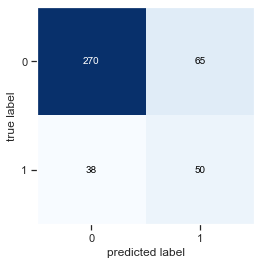

In [71]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42)

pipe = make_pipeline(scaler,lr)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_pred_test = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [110]:
train 

,bougergravity_mean,isostaticresidual_mean,totalmagnetic_mean,variablereduction_mean,filteredpotassium_mean,filteredterrestrial_mean,filteredthorium_mean,filtereduranium_mean,alohgroun_mean,alohgroup_mean,...,Pleistocene,Pliocene,Precambrian,Proterozoic,Quaternary,Silurian,Tertiary,Triassic,unknown,gold
id,,,,,,,,,,,,,,,,,,,,,
8888,-466.406891,-6.900751,-109.427673,85.052681,1.003615,53.523384,13.763311,1.070029,1.977709,0.634345,...,0,0,0,0,0,0,0,0,0,0
14292,-503.673187,-120.126038,-31.623005,-80.718369,0.558596,36.331478,9.172354,1.083756,2.032895,0.910935,...,0,0,0,0,0,0,0,0,0,1
132399,-27.807846,103.177826,-63.601978,141.103851,0.311083,15.122674,6.330700,0.381835,2.014347,0.998933,...,0,0,0,0,0,0,0,0,0,0
183374,-576.454712,-121.468323,-35.086399,-60.554379,0.641135,36.238609,7.337316,1.683628,1.973036,0.817584,...,0,0,0,0,0,0,1,0,0,1
222338,337.696960,449.877472,126.945335,460.823090,0.708677,21.707319,3.609447,0.605687,1.733690,0.016196,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99702439,54.936104,297.003296,-159.786224,-83.932182,0.242275,13.863712,4.269045,0.008501,1.718579,0.235059,...,0,0,0,0,0,0,0,0,0,0
99736264,-488.949951,211.485718,-43.169415,-69.946159,2.065807,77.188553,14.764034,2.352498,1.812306,0.015682,...,0,0,0,0,0,0,0,0,0,1
99744076,-31.221964,64.519661,-27.865591,-45.698895,0.728778,34.454945,7.617178,1.044360,2.025275,0.955016,...,0,0,0,0,0,0,0,0,0,0


In [111]:
gold = train
%store gold

Stored 'gold' (DataFrame)
